In [1]:
# default_exp ds.description.eval.traceability

# Empirical Methods for Software Traceability: Description

> This module is dedicated to evaluate word2vec/doc2vec or any neural unsupervised approaches on traceability datasets by using the theory of information transmission.
> Implementing descriptive analysis
> Author: @danaderp Feb 2021

Software Traceability is analyzed in three classes of tasks ways: description, prediction, and causal inference. 

## Description:
### Descriptive Analysis of Traceability Distance

### Descriptive Analysis of Information Transmission


 
We rely on information theory and manifold analysis to evaluate software retrieval unsupervised:
- Information Theory for Software Information Retrieval (Shared Information and Mutual Information)
- Prototypes and Criticisms for Paragraph Vectors 

## Case Studies of Info Transmission Traceability
- Case 0: Overlapping Information
- Case 1: Edge Cases of Self-Information
- Case 2: Minimum and maximum loss
- Case 3: Minimum and maximum noise
- Case 4: Orphan informative links

In [2]:
#export
import ds4se as ds
from ds4se.mining.ir import VectorizationType
from ds4se.mining.ir import SimilarityMetric
from ds4se.mining.ir import EntropyMetric

In [3]:
#export
import numpy as np

In [4]:
#export
import gensim
import pandas as pd
from itertools import product 
from random import sample 
import functools 
import os
from enum import Enum, unique, auto

In [5]:
#export
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
import math as m
import random as r
import collections
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [6]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
#export
import scipy as sc

In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Loading Experiments

In [8]:
###########

In [13]:
#experiment 1.1.0/1
experiment = 'experiments1.1.x/'
path_data = '../dvc-ds4se/metrics/traceability/' + experiment 
def libest_params():
    return{
        "system": 'libest',
        "experiment_path_w2v": path_data + '[libest-VectorizationType.word2vec-LinkType.req2tc-True-1610986303.586298].csv',
        "experiment_path_d2v": path_data + '[libest-VectorizationType.doc2vec-LinkType.req2tc-True-1609000528.06616].csv',
        'saving_path': '../dvc-ds4se/se-benchmarking/traceability/testbeds/processed/',
        'system_long': 'libest',
        'timestamp': 1596063103.098236,
        'language': 'all-corpus'
    }   

In [14]:
params = libest_params()
#params = sacp_params()

params['experiment_path_w2v']

'../dvc-ds4se/metrics/traceability/experiments1.1.x/[libest-VectorizationType.word2vec-LinkType.req2tc-True-1610986303.586298].csv'

In [15]:
%matplotlib inline

In [16]:
#export
class VectorEvaluation():
    '''Approaches Common Evaluations and Interpretations (statistical analysis)
       Loading unsupervised results
       w2v includes entropy evaluation
    '''
    def __init__(self, params):
        self.params = params
        self.df_w2v = pd.read_csv(params['experiment_path_w2v'], header=0, index_col=0, sep=' ')
        self.df_d2v = pd.read_csv(params['experiment_path_d2v'], header=0, index_col=0, sep=' ')
        
        self.sim_list_w2v = [SimilarityMetric.SCM_sim, SimilarityMetric.WMD_sim]
        self.sim_list_d2v = [SimilarityMetric.COS_sim , SimilarityMetric.EUC_sim]
        
        
        
        #Entropy
        manifoldEntropy =  self.sim_list_w2v + [EntropyMetric.Entropy_src, EntropyMetric.Entropy_tgt, 
                           EntropyMetric.JI, EntropyMetric.MI, EntropyMetric.Loss, 
                           EntropyMetric.Noise]
        manifoldEntropy = [str(i) for i in manifoldEntropy] + ['Linked?']
        self.manifoldEntropy = self.df_w2v[manifoldEntropy].copy()

        ##Concat D2V
        for i in self.sim_list_d2v:
            self.manifoldEntropy[ str(i) ] = self.df_d2v[str(i)].values
        
        self.manifoldEntropy = self.manifoldEntropy[~self.manifoldEntropy.isin([np.nan, np.inf, -np.inf]).any(1)]
        
        #SharedInfo
        sharedInfo = self.sim_list_w2v +[EntropyMetric.MSI_I,EntropyMetric.MSI_X]
        sharedInfo = [str(i) for i in sharedInfo] + ['Linked?']
        self.sharedInfo = self.df_w2v[sharedInfo].copy()
        
        for i in self.sim_list_d2v:
            self.sharedInfo[ str(i) ] = self.df_d2v[ str(i) ].values #No filtered by nans
            
        self.df_sys = self.LoadCorpus(params['timestamp'], language=params['language'], sep='~')
            
    def LoadCorpus(self, timestamp, language='js', sep=',', mode='a'):
        path_to_link = self.params['saving_path'] + '['+ self.params['system_long']  + '-' + language + '-{}].csv'.format(timestamp)
        return pd.read_csv(path_to_link, header=0, index_col=0, sep=sep)

In [17]:
#tst
test_vector_eval = VectorEvaluation(params)

In [18]:
#tst
test_vector_eval.df_w2v.shape

(1092, 15)

In [19]:
#tst 
test_vector_eval.df_d2v.shape

(1092, 10)

In [20]:
assert test_vector_eval.df_w2v.Source[0] == test_vector_eval.df_d2v.Source[0]

In [21]:
assert test_vector_eval.df_w2v.Target[0] == test_vector_eval.df_d2v.Target[0]

In [22]:
assert test_vector_eval.df_w2v.Source[1091] == test_vector_eval.df_d2v.Source[1091]

In [23]:
assert test_vector_eval.df_w2v.Target[1091] == test_vector_eval.df_d2v.Target[1091]

In [24]:
#tst
test_vector_eval.manifoldEntropy.head(2)

,SimilarityMetric.SCM_sim,SimilarityMetric.WMD_sim,EntropyMetric.Entropy_src,EntropyMetric.Entropy_tgt,EntropyMetric.JI,EntropyMetric.MI,EntropyMetric.Loss,EntropyMetric.Noise,Linked?,SimilarityMetric.COS_sim,SimilarityMetric.EUC_sim
0,0.484039,0.517108,6.64222,8.061470,8.192841,6.510849,1.550621,0.131371,0.0,0.065375,0.98261
1,0.442650,0.516837,6.64222,7.323301,7.529213,6.436309,0.886993,0.205911,0.0,-0.042920,0.98144


In [25]:
#tst
test_vector_eval.sharedInfo.head(2)

,SimilarityMetric.SCM_sim,SimilarityMetric.WMD_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,Linked?,SimilarityMetric.COS_sim,SimilarityMetric.EUC_sim
0,0.484039,0.517108,5.939855,1.423211,0.0,0.065375,0.98261
1,0.442650,0.516837,5.836642,1.422459,0.0,-0.042920,0.98144


In [26]:
#Sys
test_vector_eval.df_sys.head(2)

,ids,filenames,text,type,conv,bpe128k,bpe32k,bpe8k
0,test_data/LibEST_semeru_format/test/us903.c,us903.c,/*--------------------------------------------...,tc,unit test user stori server simpl enrol august...,"['▁/*', '----------------', '----------------'...","['▁/', '*', '--------', '--------', '--------'...","['▁/', '*', '-', '-', '-', '-', '-', '-', '-',..."
1,test_data/LibEST_semeru_format/test/us3496.c,us3496.c,/*--------------------------------------------...,tc,unit test uri path segment extens support marc...,"['▁/*', '----------------', '----------------'...","['▁/', '*', '--------', '--------', '--------'...","['▁/', '*', '-', '-', '-', '-', '-', '-', '-',..."


In [27]:
test_vector_eval.df_sys.groupby(['type']).size().reset_index(name='counts')

,type,counts
0,req,52
1,src,14
2,tc,21


#  Data Science Description Task
Classification/evaluation metrics for highly imbalanced data [(see Forum)](https://stats.stackexchange.com/questions/222558/classification-evaluation-metrics-for-highly-imbalanced-data).
Description is using data to provide a quantitative summary of certain features of the world. Descriptive tasks include, for example, computing the proportion of individuals with diabetes in a large healthcare database and representing social networks in a community. The analytics employed for description range from elementary calculations (e.g., a mean or a proportion) to sophisticated techniques such as unsupervised learning algorithms (e.g., cluster analysis) and clever data visualizations.

In [28]:
#export
class ExploratoryDataSoftwareAnalysis(VectorEvaluation):
    '''
    This class process "Description" Data Science Techniques
    '''
    def __init__(self, params):
        super().__init__(params)
        
        descriptors = {
            "entropy_set":['Linked?','EntropyMetric.Entropy_src','EntropyMetric.Entropy_tgt','EntropyMetric.JI','EntropyMetric.MI', 'EntropyMetric.Loss', 'EntropyMetric.Noise'],
            "similarity_set":['Linked?','SimilarityMetric.SCM_sim', 'SimilarityMetric.WMD_sim', 'SimilarityMetric.COS_sim', 'SimilarityMetric.EUC_sim' ],
            "shared_set":['Linked?','EntropyMetric.MSI_I', 'EntropyMetric.MSI_X']
        }
        
        self.entropy_set = self.manifoldEntropy[descriptors['entropy_set']].copy()
        self.similarity_set = self.manifoldEntropy[descriptors['similarity_set']].copy()
        self.shared_set = self.sharedInfo[descriptors['shared_set']].copy()
        
    def mean_confidence_interval(self, data, confidence=0.95):
        a = 1.0 * np.array(data)
        n = len(a)
        m, se = np.mean(a), sc.stats.sem(a)
        h = se * sc.stats.t.ppf((1 + confidence) / 2., n-1)
        return round(m,2), round(m-h,2), round(m+h,2), round(h,2)
    
    def bootstrapping_mean(self, vector, samples=10000, size = 500 ):
        '''Confidence Intervals are  Statistical test performed visully'''
        np.random.seed(42)
        mean = []
        for i in range(samples):
            boot = np.random.choice(vector, size=size)
            mean += [np.mean(boot)]
            pass
        
        return mean

    def bootstrapping_plot(self,df,size=20, samples=500, color='b', params = ['Linked?']):
        pd.plotting.bootstrap_plot(
            df[params],
            size=size,
            samples=samples,
            color=color
        )
        pass    
    
    def confidence_interval_plot(self, 
                                 list_category, 
                                 list_low, 
                                 list_up,
                                 color,
                                 byLink = False
                                ):
        data_dict = {}
        data_dict['category'] = list_category
        data_dict['lower'] = list_low
        data_dict['upper'] = list_up
        dataset = pd.DataFrame(data_dict)
        for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
            #Todo please modify this orange
            if byLink:
                #logging.info(str(y))
                plt.plot((lower,upper),(y,y),'o',color=color[y%2])
            else:
                plt.plot((lower,upper),(y,y),'o',color=color[0])
        plt.yticks(range(len(dataset)),list(dataset['category']))
        plt.grid()
        plt.show()
        pass
    
    def __bootstrapping_iter(
                                self,
                                df,
                                samples=10000, 
                                conf=0.95
                                ):
        list_category = []
        list_low = []
        list_up =[]
        for column_name, item in df.iteritems():
            m = self.bootstrapping_mean(
                item.values,
                samples=10000, 
                size=len(item.values) #Size is by default the same size of the original sample
                )
            ci = self.mean_confidence_interval(m, conf)
            list_category += [column_name]
            list_low += [ci[1]]
            list_up += [ci[2]]
            logging.info(column_name + ' : ' + str(ci))
        return list_category, list_low, list_up
    
    def ci_bootstrapping(self,
                         df, 
                         samples=10000, 
                         conf=0.95, 
                         color=['blue','red'],
                         byLink = False
                        ):
        '''Main method for generating bootstrapping CIs'''
        list_category = []
        list_low = []
        list_up = []
        
        if byLink:
            list_category_1,list_low_1,list_up_1 = self.__bootstrapping_iter(
                                df[df['Linked?']== 1], samples, conf)
            list_category_0,list_low_0,list_up_0 = self.__bootstrapping_iter(
                                df[df['Linked?']== 0], samples, conf)                       
            color_ = []
            for index in range(len(list_category_0)):
                list_category += [list_category_1[index]+'_1',list_category_0[index]+'_0']
                list_low += [list_low_1[index], list_low_0[index]]
                list_up += [list_up_1[index], list_up_0[index]]
                
                if index%2 == 0:
                    color_.insert(index,color[0])
                else:
                    color_.insert(index,color[1])
                pass
                                  
            self.confidence_interval_plot(list_category,list_low,list_up,color_,byLink)
            
        else:
            list_category,list_low,list_up = self.__bootstrapping_iter(
                                df, samples, conf)
            self.confidence_interval_plot(list_category,list_low,list_up,color)
        
        pass

In [29]:
EDA = ExploratoryDataSoftwareAnalysis( params = params ) #<---- Parameter 

## [1] Descriptive Statistics

### Distance and Similarity

In [30]:
EDA.similarity_set.describe().round(2)

,Linked?,SimilarityMetric.SCM_sim,SimilarityMetric.WMD_sim,SimilarityMetric.COS_sim,SimilarityMetric.EUC_sim
count,1092.00,1092.00,1092.00,1092.00,1092.00
mean,0.32,0.37,0.49,-0.00,0.98
std,0.47,0.10,0.02,0.05,0.00
min,0.00,0.16,0.45,-0.13,0.98
25%,0.00,0.31,0.48,-0.03,0.98
50%,0.00,0.35,0.49,-0.00,0.98
75%,1.00,0.41,0.50,0.03,0.98
max,1.00,0.71,0.60,0.14,0.98


In [31]:
EDA.similarity_set.groupby(['Linked?']).agg(['count','mean','std','median']).round(2)

SimilarityMetric.SCM_sim                    SimilarityMetric.WMD_sim  \
                           count  mean   std median                    count   
Linked?                                                                        
0.0                          740  0.37  0.10   0.35                      740   
1.0                          352  0.37  0.09   0.35                      352   

                           SimilarityMetric.COS_sim                    \
         mean   std median                    count mean   std median   
Linked?                                                                 
0.0      0.49  0.02   0.49                      740 -0.0  0.05   -0.0   
1.0      0.49  0.02   0.49                      352 -0.0  0.05   -0.0   

        SimilarityMetric.EUC_sim                    
                           count  mean  std median  
Linked?                                             
0.0                          740  0.98  0.0   0.98  
1.0                          352  0.98  0.0   0.98

### Information Transmission

In [32]:
EDA.entropy_set.describe().round(2)

,Linked?,EntropyMetric.Entropy_src,EntropyMetric.Entropy_tgt,EntropyMetric.JI,EntropyMetric.MI,EntropyMetric.Loss,EntropyMetric.Noise
count,1092.00,1092.00,1092.00,1092.00,1092.00,1092.00,1092.00
mean,0.32,6.54,7.47,7.61,6.40,1.07,0.14
std,0.47,0.82,0.39,0.39,0.72,0.81,0.14
min,0.00,4.53,6.91,6.92,4.51,-0.63,0.01
25%,0.00,5.95,7.19,7.31,5.90,0.45,0.05
50%,0.00,6.57,7.37,7.50,6.43,1.00,0.09
75%,1.00,7.12,7.74,8.04,6.95,1.59,0.17
max,1.00,7.97,8.12,8.56,7.73,3.59,0.95


In [33]:
EDA.entropy_set.groupby(['Linked?']).agg(['count','mean','std','median']).round(2)

EntropyMetric.Entropy_src                     \
                            count  mean   std median   
Linked?                                                
0.0                           740  6.46  0.84   6.48   
1.0                           352  6.71  0.74   6.75   

        EntropyMetric.Entropy_tgt                    EntropyMetric.JI        \
                            count  mean   std median            count  mean   
Linked?                                                                       
0.0                           740  7.49  0.40   7.37              740  7.62   
1.0                           352  7.44  0.38   7.32              352  7.59   

         ... EntropyMetric.MI        EntropyMetric.Loss                     \
         ...              std median              count  mean   std median   
Linked?  ...                                                                 
0.0      ...             0.75   6.40                740  1.16  0.84   1.08   
1.0      ...             0.64   6.61                352  0.88  0.72   0.82   

        EntropyMetric.Noise                     
                      count  mean   std median  
Linked?                                         
0.0                     740  0.13  0.13   0.09  
1.0                     352  0.15  0.15   0.10  

[2 rows x 24 columns]

### Shared Information

In [34]:
EDA.shared_set.describe().round(2)

,Linked?,EntropyMetric.MSI_I,EntropyMetric.MSI_X
count,1092.00,1092.00,1092.00
mean,0.32,5.42,1.42
std,0.47,0.64,0.01
min,0.00,3.38,1.37
25%,0.00,5.06,1.41
50%,0.00,5.47,1.42
75%,1.00,5.82,1.42
max,1.00,7.20,1.43


In [35]:
EDA.shared_set.groupby(['Linked?']).agg(['count','mean','std','median']).round(2)

EntropyMetric.MSI_I                    EntropyMetric.MSI_X        \
                      count  mean   std median               count  mean   
Linked?                                                                    
0.0                     740  5.35  0.65   5.42                 740  1.41   
1.0                     352  5.58  0.57   5.57                 352  1.42   

                      
          std median  
Linked?               
0.0      0.01   1.42  
1.0      0.01   1.42

## [2] Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f299512d748>,
      dtype=object)

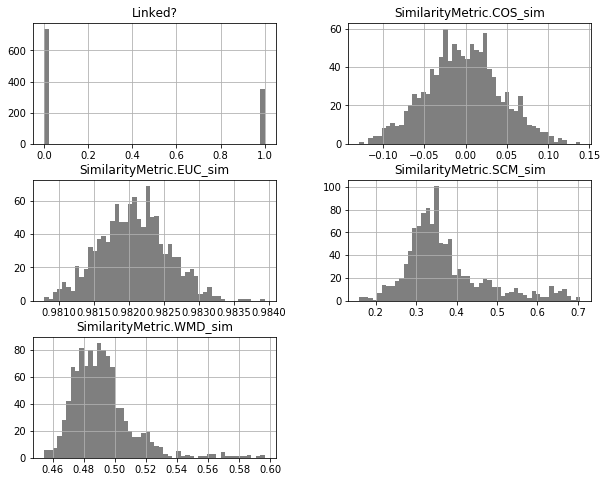

In [36]:
EDA.similarity_set.hist(color='k', bins=50, figsize=[10,8], alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f298cc96470>,
      dtype=object)

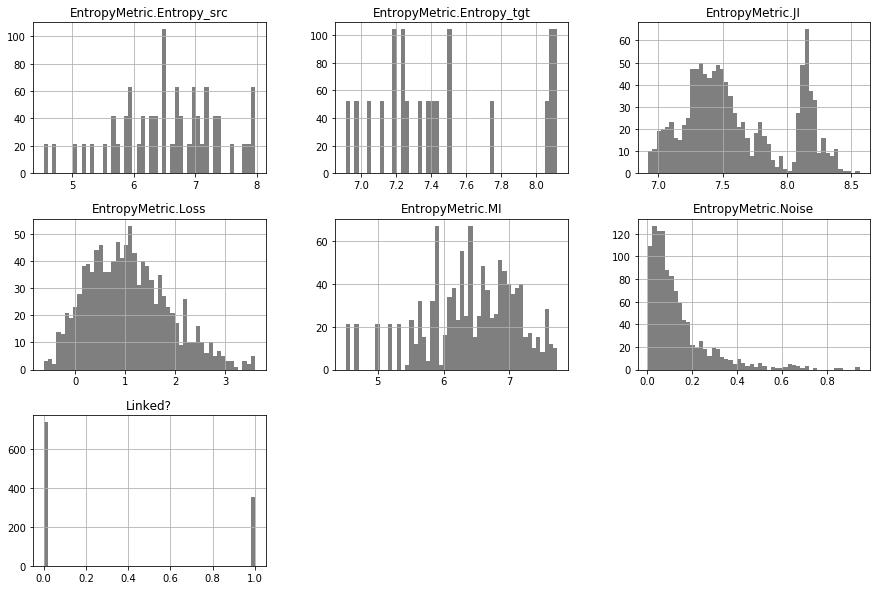

In [37]:
EDA.entropy_set.hist(color='k', bins=50, figsize=[15,10], alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f298c3f57b8>,
      dtype=object)

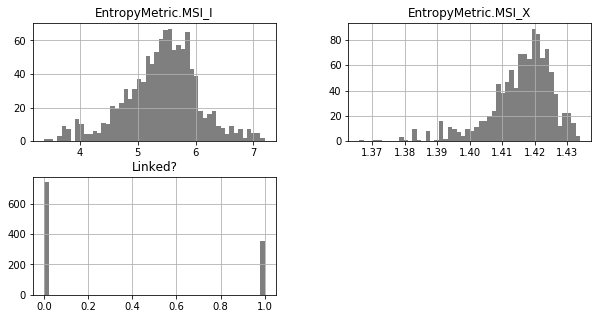

In [38]:
EDA.shared_set.hist(color='k', bins=50, figsize=[10,5], alpha=0.5)

The following sections are focused on the three common error bars: standard deviations, confidence intervals, and stardard errors

## [3] Confidence Intervals 
Confidence Intervals. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range. The confidence level is chosen by the investigator. For a given estimation in a given sample, using a higher confidence level generates a wider (i.e., less precise) confidence interval. In general terms, a confidence interval for an unknown parameter is based on sampling the distribution of a corresponding estimator

We use bootstrapping! Bootstrapping is a robust technique. We use it for calculating the mean and standard error. 

### Distance & Similarity Measures

2021-03-10 03:32:35,759 : INFO : Linked? : (0.32, 0.32, 0.32, 0.0)
2021-03-10 03:32:36,368 : INFO : SimilarityMetric.SCM_sim : (0.37, 0.37, 0.37, 0.0)
2021-03-10 03:32:36,970 : INFO : SimilarityMetric.WMD_sim : (0.49, 0.49, 0.49, 0.0)
2021-03-10 03:32:37,564 : INFO : SimilarityMetric.COS_sim : (-0.0, -0.0, -0.0, 0.0)
2021-03-10 03:32:38,160 : INFO : SimilarityMetric.EUC_sim : (0.98, 0.98, 0.98, 0.0)


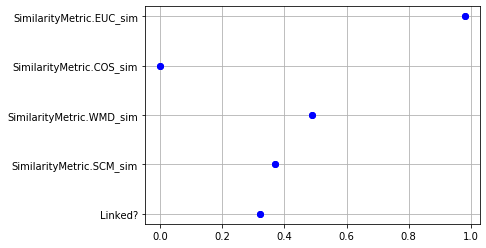

In [39]:
#Distance & Similarity Measures
EDA.ci_bootstrapping(df = EDA.similarity_set, samples=10000, conf=0.95 )

2021-03-10 03:32:38,727 : INFO : Linked? : (1.0, 1.0, 1.0, 0.0)
2021-03-10 03:32:39,130 : INFO : SimilarityMetric.SCM_sim : (0.37, 0.36, 0.37, 0.0)
2021-03-10 03:32:39,534 : INFO : SimilarityMetric.WMD_sim : (0.49, 0.49, 0.49, 0.0)
2021-03-10 03:32:39,938 : INFO : SimilarityMetric.COS_sim : (-0.0, -0.0, -0.0, 0.0)
2021-03-10 03:32:40,340 : INFO : SimilarityMetric.EUC_sim : (0.98, 0.98, 0.98, 0.0)
2021-03-10 03:32:40,808 : INFO : Linked? : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:32:41,269 : INFO : SimilarityMetric.SCM_sim : (0.37, 0.37, 0.37, 0.0)
2021-03-10 03:32:41,731 : INFO : SimilarityMetric.WMD_sim : (0.49, 0.49, 0.49, 0.0)
2021-03-10 03:32:42,194 : INFO : SimilarityMetric.COS_sim : (-0.0, -0.0, -0.0, 0.0)
2021-03-10 03:32:42,657 : INFO : SimilarityMetric.EUC_sim : (0.98, 0.98, 0.98, 0.0)


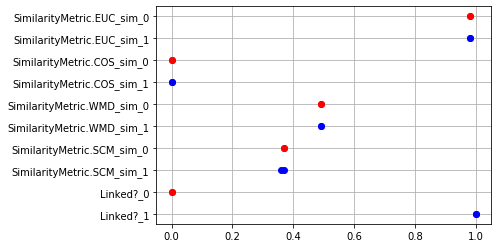

In [40]:
EDA.ci_bootstrapping(df = EDA.similarity_set, 
                     samples=10000, 
                     conf=0.95,
                     byLink = True
                    )

### Information Measures

2021-03-10 03:32:43,474 : INFO : Linked? : (0.32, 0.32, 0.32, 0.0)
2021-03-10 03:32:44,077 : INFO : EntropyMetric.Entropy_src : (6.54, 6.54, 6.54, 0.0)
2021-03-10 03:32:44,683 : INFO : EntropyMetric.Entropy_tgt : (7.47, 7.47, 7.47, 0.0)
2021-03-10 03:32:45,290 : INFO : EntropyMetric.JI : (7.61, 7.61, 7.61, 0.0)
2021-03-10 03:32:45,893 : INFO : EntropyMetric.MI : (6.4, 6.4, 6.41, 0.0)
2021-03-10 03:32:46,501 : INFO : EntropyMetric.Loss : (1.07, 1.07, 1.07, 0.0)
2021-03-10 03:32:47,109 : INFO : EntropyMetric.Noise : (0.14, 0.14, 0.14, 0.0)


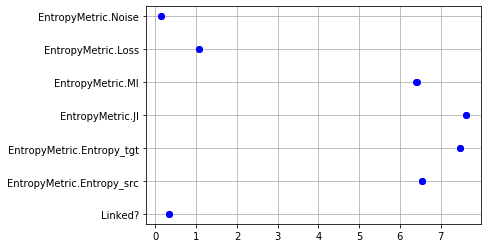

In [41]:
#Information Measures
EDA.ci_bootstrapping(df = EDA.entropy_set, samples=10000, conf=0.95 )

2021-03-10 03:32:47,713 : INFO : Linked? : (1.0, 1.0, 1.0, 0.0)
2021-03-10 03:32:48,123 : INFO : EntropyMetric.Entropy_src : (6.71, 6.71, 6.71, 0.0)
2021-03-10 03:32:48,530 : INFO : EntropyMetric.Entropy_tgt : (7.44, 7.44, 7.44, 0.0)
2021-03-10 03:32:48,936 : INFO : EntropyMetric.JI : (7.59, 7.59, 7.59, 0.0)
2021-03-10 03:32:49,343 : INFO : EntropyMetric.MI : (6.56, 6.56, 6.56, 0.0)
2021-03-10 03:32:49,748 : INFO : EntropyMetric.Loss : (0.88, 0.88, 0.88, 0.0)
2021-03-10 03:32:50,156 : INFO : EntropyMetric.Noise : (0.15, 0.15, 0.15, 0.0)
2021-03-10 03:32:50,627 : INFO : Linked? : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:32:51,097 : INFO : EntropyMetric.Entropy_src : (6.46, 6.46, 6.46, 0.0)
2021-03-10 03:32:51,567 : INFO : EntropyMetric.Entropy_tgt : (7.49, 7.49, 7.49, 0.0)
2021-03-10 03:32:52,039 : INFO : EntropyMetric.JI : (7.62, 7.62, 7.62, 0.0)
2021-03-10 03:32:52,511 : INFO : EntropyMetric.MI : (6.33, 6.33, 6.33, 0.0)
2021-03-10 03:32:52,978 : INFO : EntropyMetric.Loss : (1.16, 1.16, 1.16

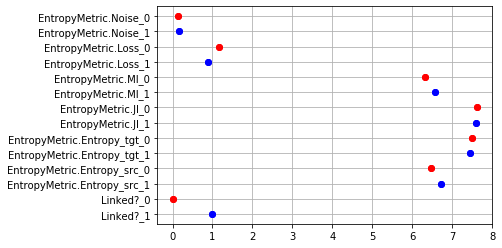

In [42]:
EDA.ci_bootstrapping(
    df = EDA.entropy_set, samples=10000, conf=0.95, byLink = True )

### Shared Information

2021-03-10 03:32:54,303 : INFO : Linked? : (0.32, 0.32, 0.32, 0.0)
2021-03-10 03:32:54,906 : INFO : EntropyMetric.MSI_I : (5.42, 5.42, 5.43, 0.0)
2021-03-10 03:32:55,513 : INFO : EntropyMetric.MSI_X : (1.42, 1.42, 1.42, 0.0)


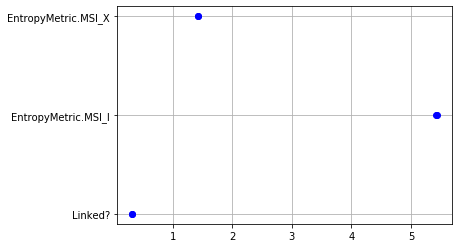

In [43]:
#Shared Information
EDA.ci_bootstrapping(df = EDA.shared_set, samples=10000, conf=0.95 )

2021-03-10 03:32:56,087 : INFO : Linked? : (1.0, 1.0, 1.0, 0.0)
2021-03-10 03:32:56,503 : INFO : EntropyMetric.MSI_I : (5.58, 5.58, 5.58, 0.0)
2021-03-10 03:32:56,914 : INFO : EntropyMetric.MSI_X : (1.42, 1.42, 1.42, 0.0)
2021-03-10 03:32:57,385 : INFO : Linked? : (0.0, 0.0, 0.0, 0.0)
2021-03-10 03:32:57,857 : INFO : EntropyMetric.MSI_I : (5.35, 5.35, 5.35, 0.0)
2021-03-10 03:32:58,323 : INFO : EntropyMetric.MSI_X : (1.41, 1.41, 1.41, 0.0)


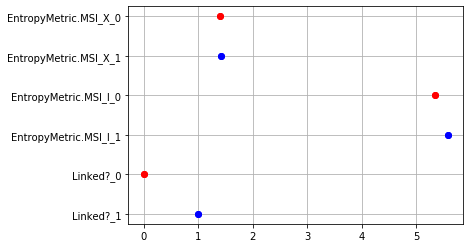

In [44]:
EDA.ci_bootstrapping(
    df = EDA.shared_set, samples=10000, conf=0.95, byLink = True )

## [4] Standard Deviations
These tell you how the data is distributed around the mean . Big standard deviations tell you that some data points were pretty far from the mean.


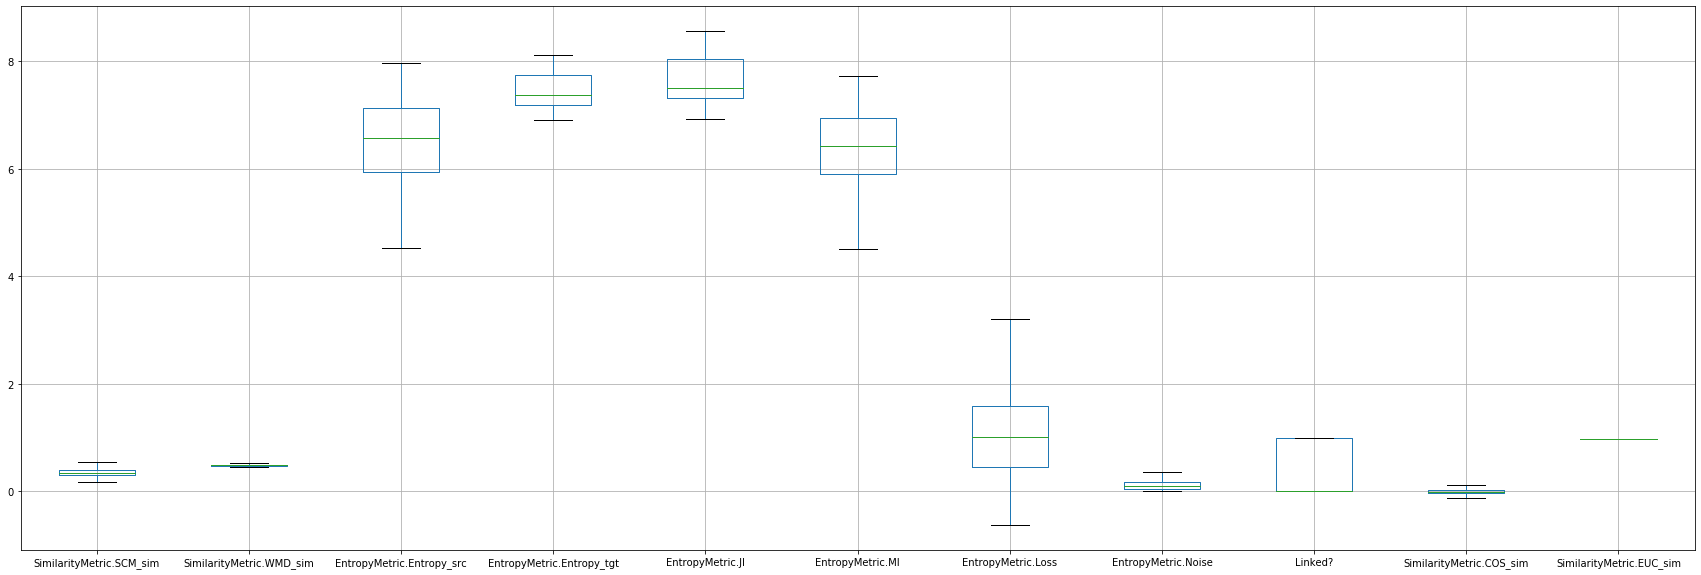

In [45]:
EDA.manifoldEntropy.boxplot(figsize=[30, 10], showfliers=False) #Without Outliers

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f298ba6c908>,
      dtype=object)

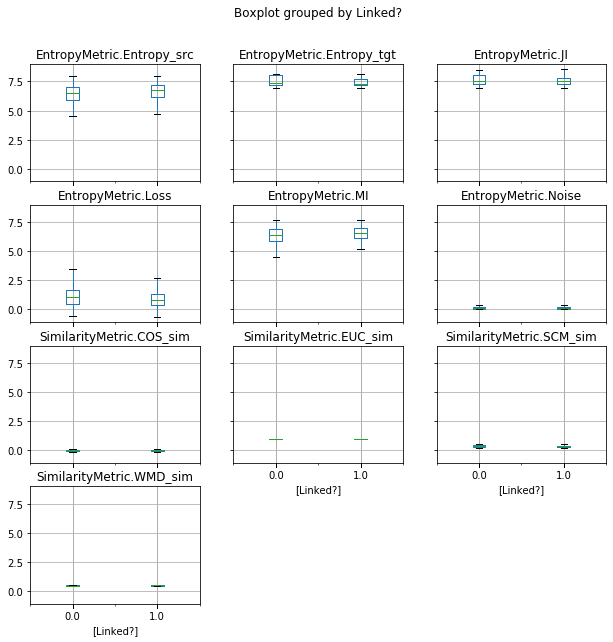

In [46]:
#Deviations grouped by Ground Truth (GT)
EDA.manifoldEntropy.boxplot(by='Linked?',
                            figsize=[10, 10],
                            bootstrap = 10000,
                            meanline = True,
                            showfliers=False #Without Outliers
                           ) 

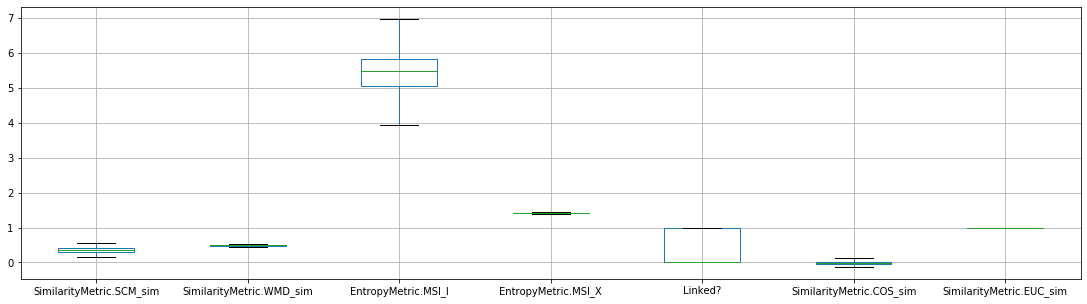

In [47]:
EDA.sharedInfo.boxplot(figsize=[19, 5], showfliers=False)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f298b5d4828>,
      dtype=object)

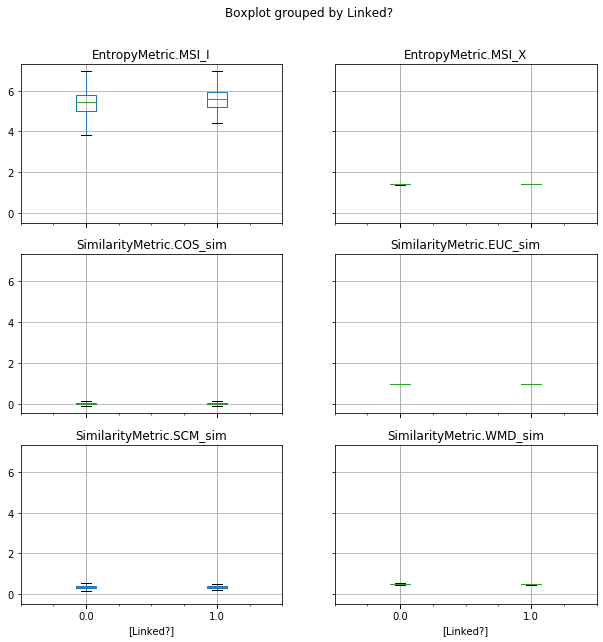

In [48]:
#Deviations grouped by Ground Truth (GT)
EDA.sharedInfo.boxplot(by='Linked?',figsize=[10, 10], showfliers=False)

## [5] Scatter Matrix
Scatter matrix help us to identify correlations. However, the proper analysis is perform in the "Predictive notebook"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f298add79b0>,
      dtype=object)

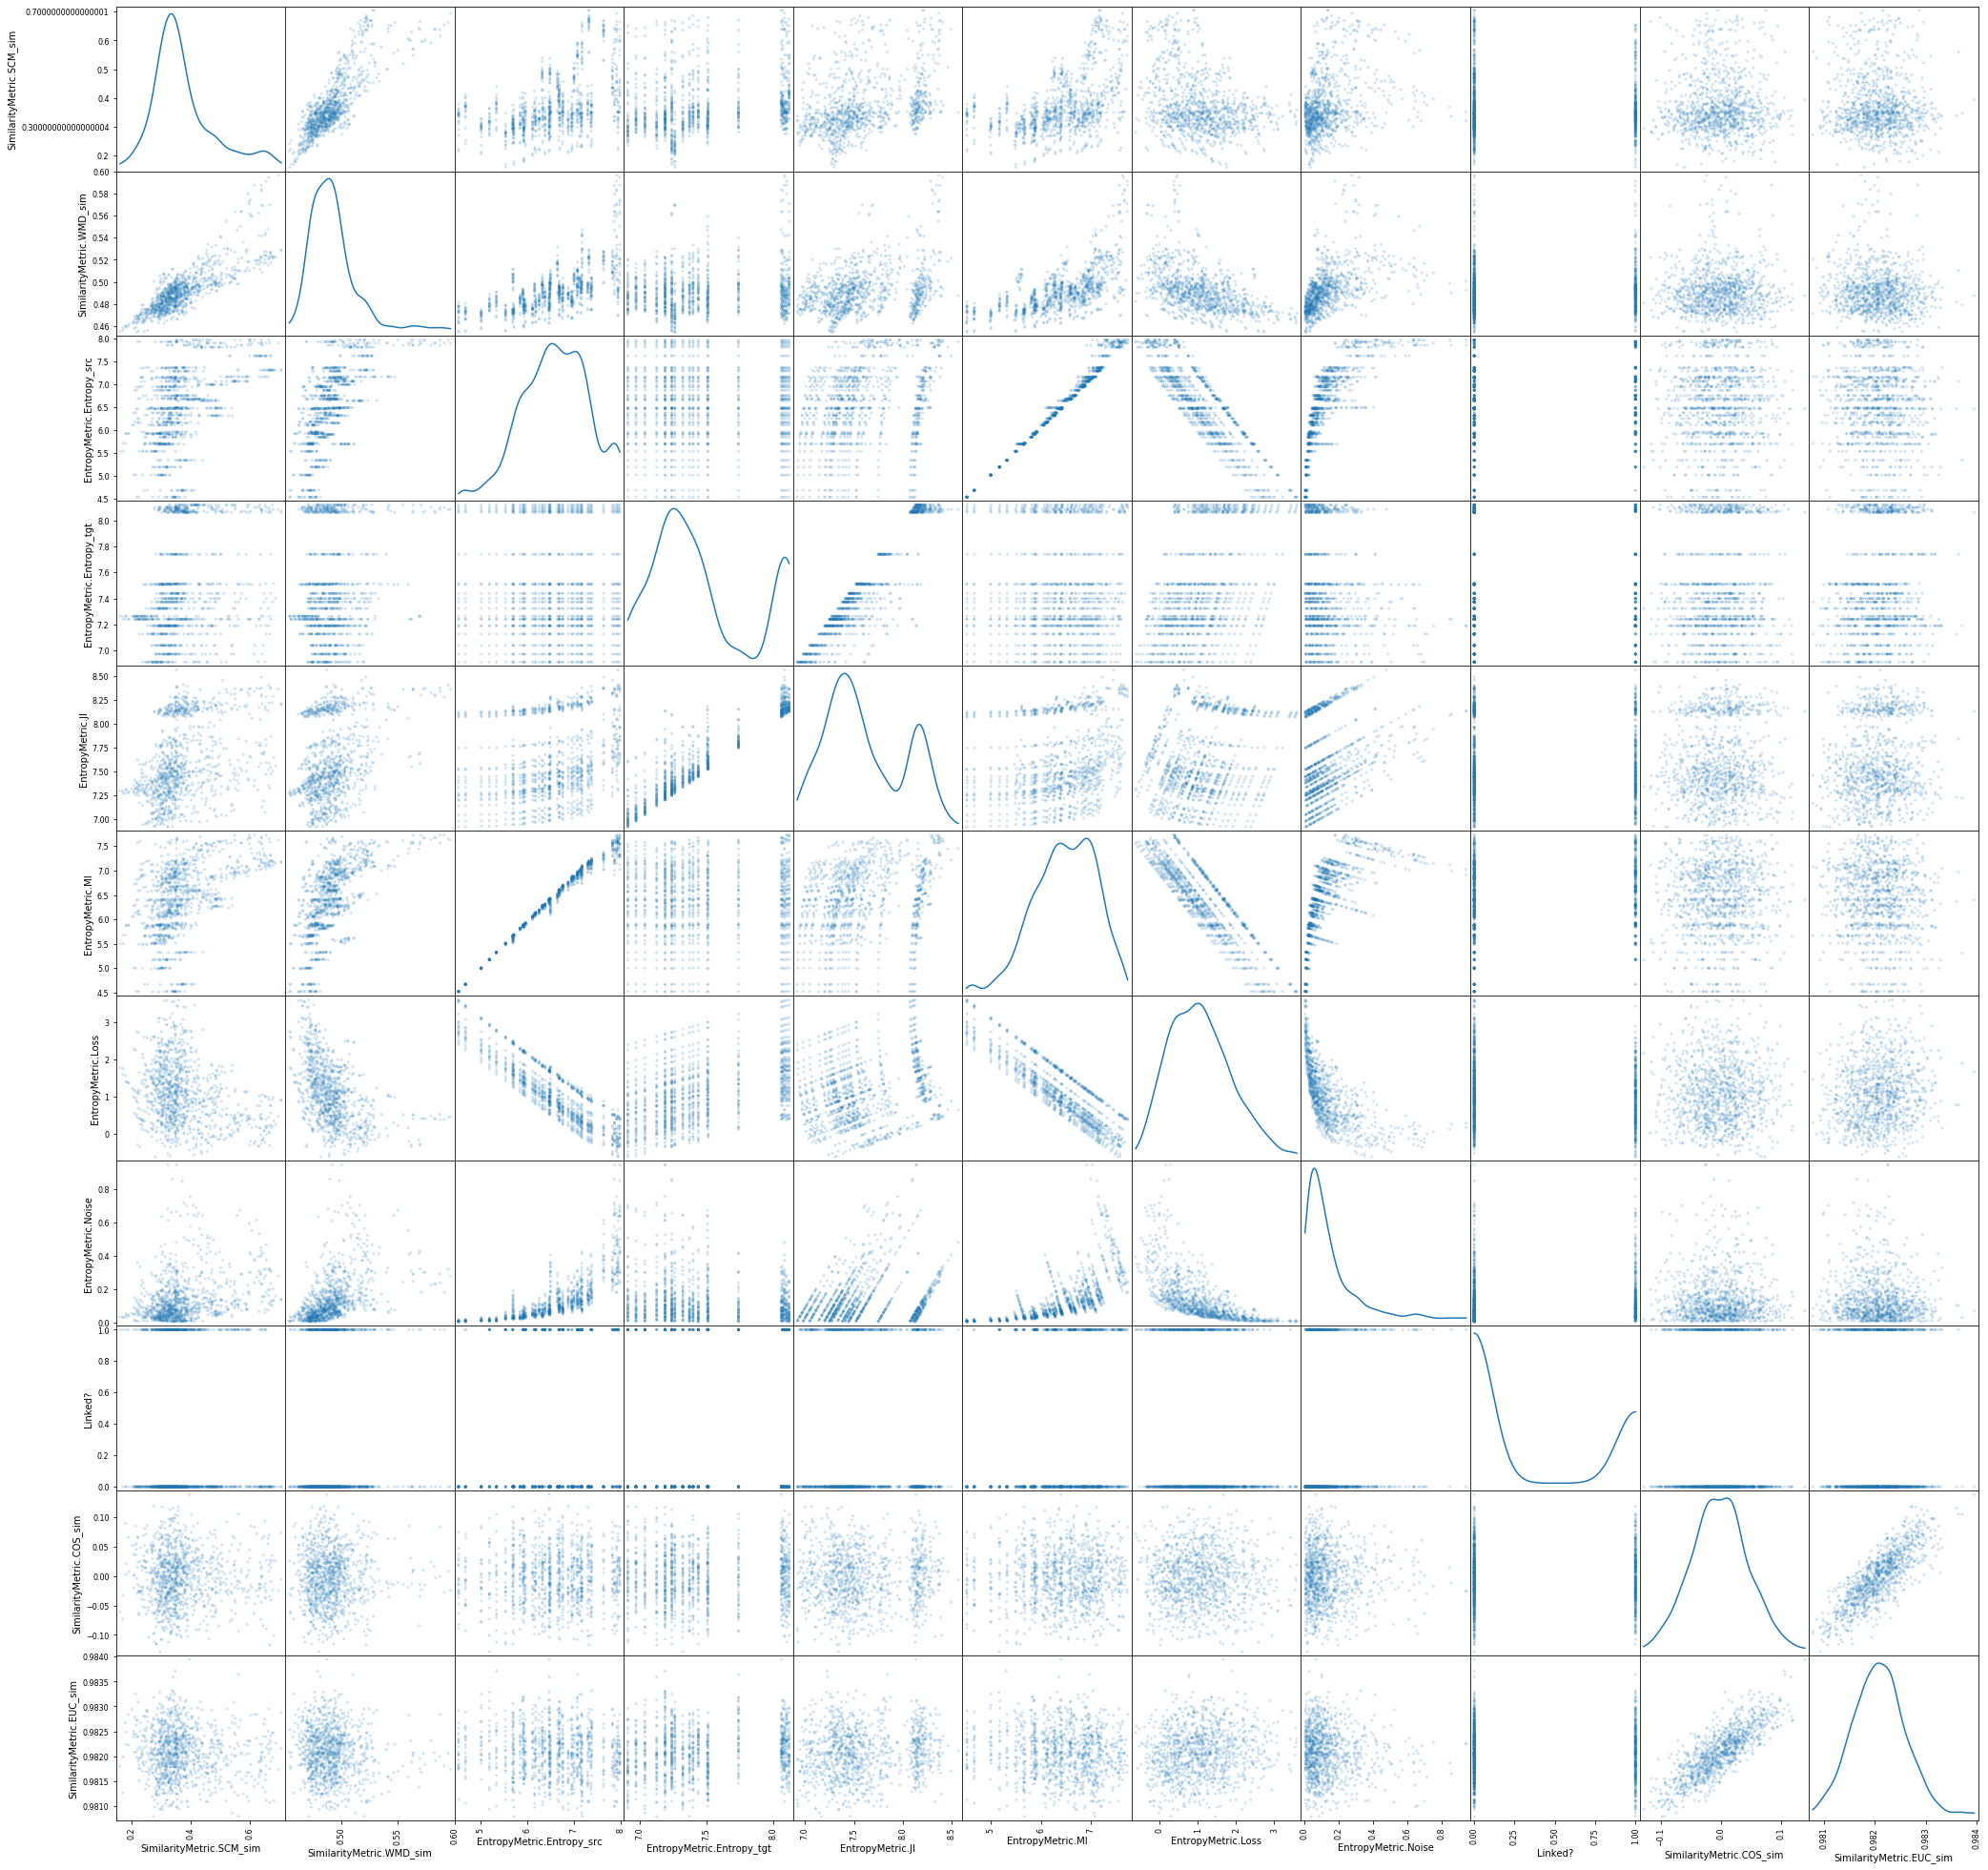

In [49]:
scatter_matrix(EDA.manifoldEntropy, alpha=0.2, figsize=(35, 35), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2987371c18>,
      dtype=object)

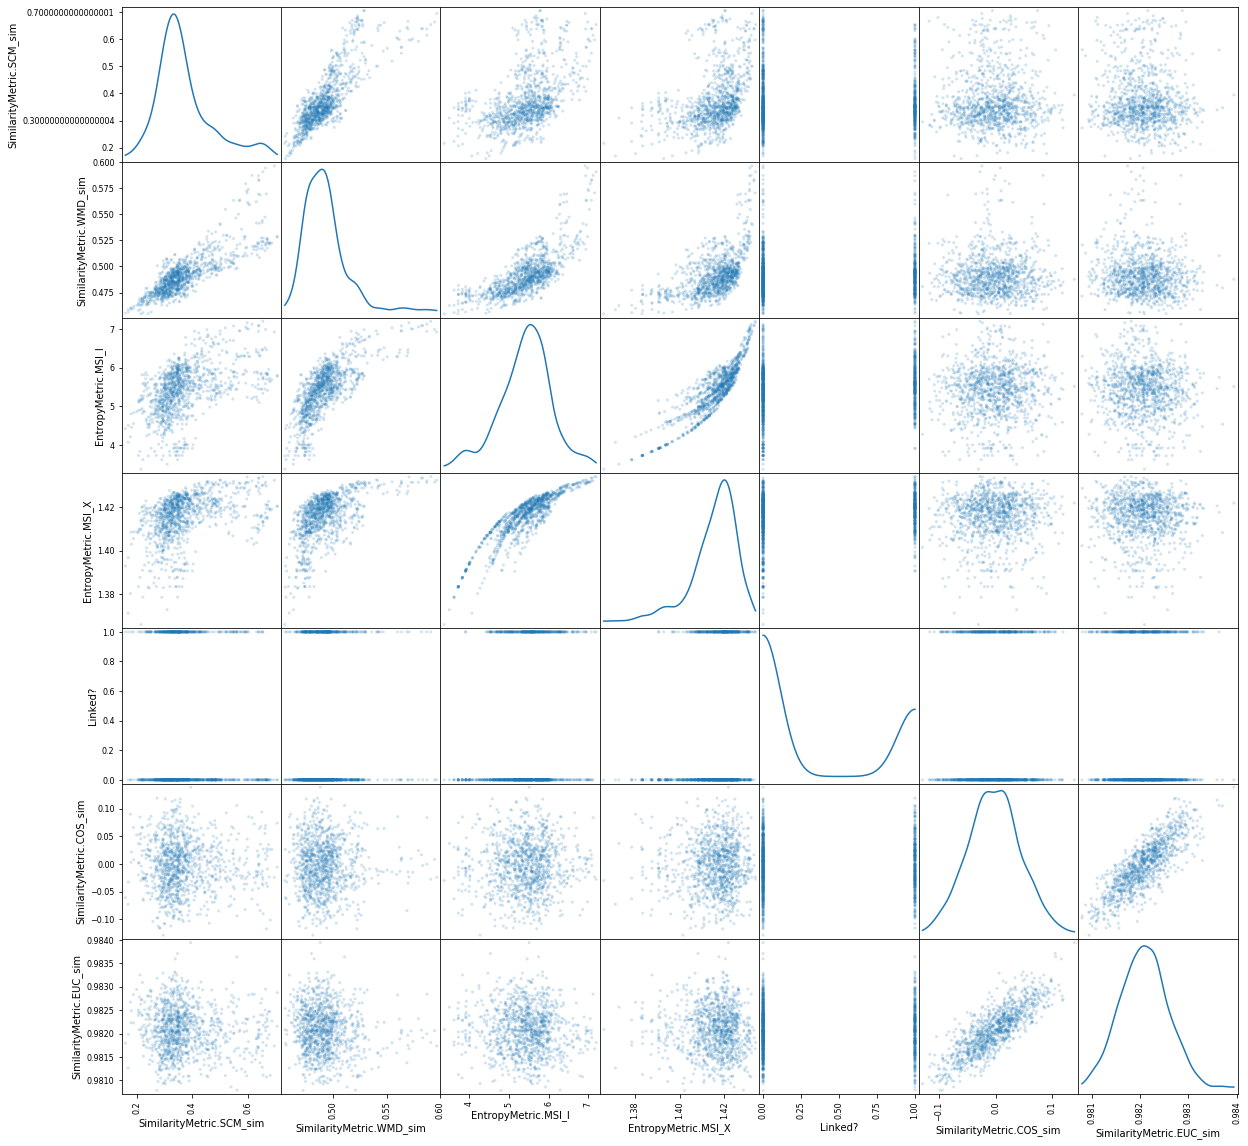

In [50]:
scatter_matrix(EDA.sharedInfo, 
               alpha=0.2, 
               figsize=(20, 20), 
               diagonal='kde',
               #grid = True
              )

## [6] Auto Correlations
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. The lag argument may be passed, and when lag=1 the plot is essentially data[:-1] vs. data[1:].

The shape of the lag plot can provide clues about the underlying structure of your data. For example:

A linear shape to the plot suggests that an autoregressive model is probably a better choice.
An elliptical plot suggests that the data comes from a single-cycle sinusoidal model.

Randomness
Creating a lag plot enables you to check for randomness. Random data will spread fairly evenly both horizontally and vertically. If you cannot see a pattern in the graph, your data is most probably random. On the other hand a shape or trend to the graph (like a linear pattern) indicates the data is not random

If your data shows a linear pattern, it suggests autocorrelation is present. A positive linear trend (i.e. going upwards from left to right) is suggestive of positive autocorrelation; a negative linear trend (going downwards from left to right) is suggestive of negative autocorrelation. The tighter the data is clustered around the diagonal, the more autocorrelation is present; perfectly autocorrelated data will cluster in a single diagonal line

### Similarity Measures

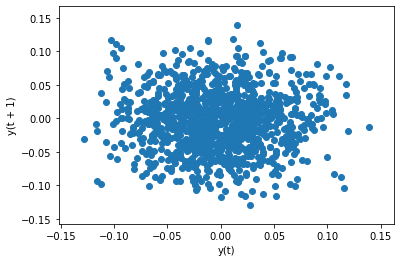

In [51]:
lag_plot( EDA.similarity_set[['SimilarityMetric.COS_sim']] )

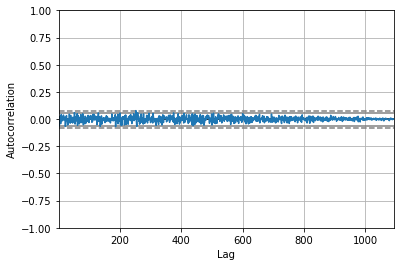

In [52]:
pd.plotting.autocorrelation_plot(EDA.similarity_set[['SimilarityMetric.COS_sim']])

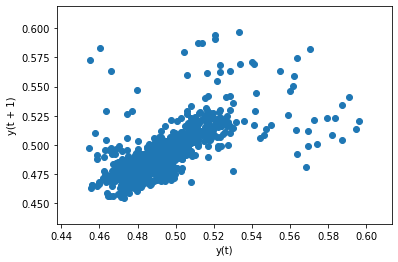

In [53]:
lag_plot( EDA.similarity_set[['SimilarityMetric.WMD_sim']] )

### Info. Transmission Measures

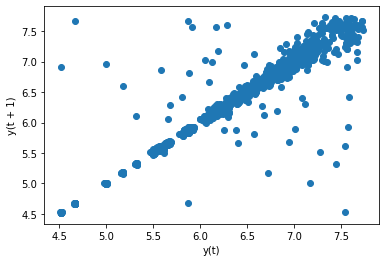

In [54]:
lag_plot( EDA.entropy_set[['EntropyMetric.MI']] )

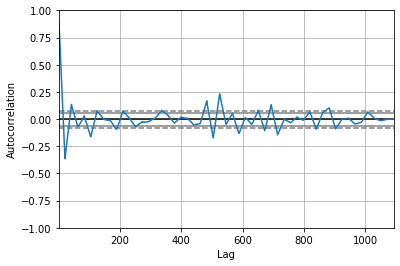

In [55]:
pd.plotting.autocorrelation_plot(EDA.entropy_set[['EntropyMetric.MI']])

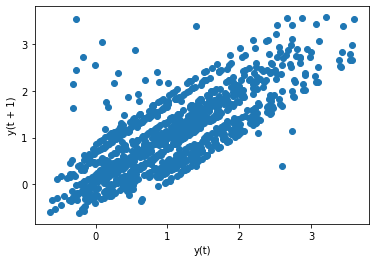

In [56]:
lag_plot( EDA.entropy_set[['EntropyMetric.Loss']] )

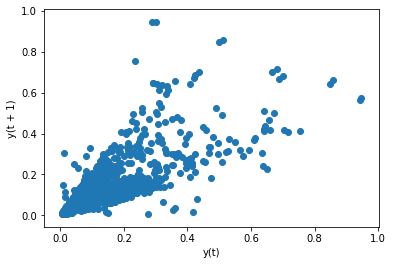

In [57]:
lag_plot( EDA.entropy_set[['EntropyMetric.Noise']] )

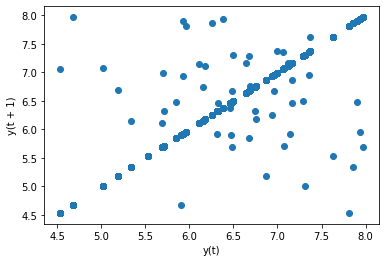

In [58]:
lag_plot( EDA.entropy_set[['EntropyMetric.Entropy_src']] )

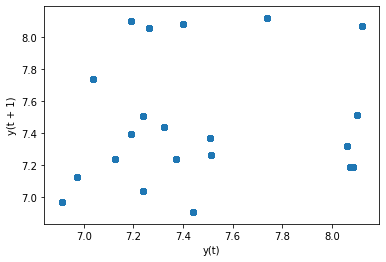

In [59]:
lag_plot( EDA.entropy_set[['EntropyMetric.Entropy_tgt']] )

### Shared Measures

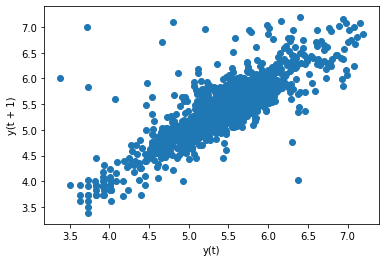

In [60]:
lag_plot( EDA.shared_set[['EntropyMetric.MSI_I']] )

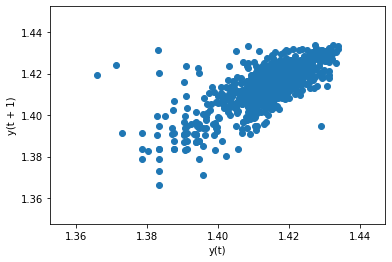

In [61]:
lag_plot( EDA.shared_set[['EntropyMetric.MSI_X']] )

# Case Studies of Info Transmission Traceability
The goal of this section is to detect specific examples of odd traceability cases for a given dataset (or corpus). For instance, edge cases (min max), imbalanced data, or orphan links. 

## Case 0: Overlapping Information
This study shows potential overlaps on artifacts by measures the Minimum Shared Information Entropy (MSI_I). Ideally, lower values of MSI means that the link should not exist. Conversely, higher values of MSI means that there are enough conditions for the link to exist. 

In [62]:
## MAX MSI_I
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MSI_I']==EDA.df_w2v['EntropyMetric.MSI_I'].max()][['Source','Target','EntropyMetric.MSI_I','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ57.txt',
        'test_data/LibEST_semeru_format/test/us2174.c',
        7.195799290344236, 1.0]], dtype=object)

In [63]:
## MIN MSI_I
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MSI_I']==EDA.df_w2v['EntropyMetric.MSI_I'].min()][['Source','Target','EntropyMetric.MSI_I','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us895.c', 3.378783493486176,
        0.0]], dtype=object)

#### Nan Cases of MSI
These cases are particularly relevant because show potential links that do not share any information at all

In [64]:
df_nan_msi = EDA.df_w2v[np.isnan(EDA.df_w2v['EntropyMetric.MSI_I'])]

In [65]:
df_nan_msi.head(2)

,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.Entropy_src,EntropyMetric.Entropy_tgt,EntropyMetric.JI,EntropyMetric.MI,EntropyMetric.Loss,EntropyMetric.Noise,Linked?


In [66]:
df_nan_msi.describe()

,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.Entropy_src,EntropyMetric.Entropy_tgt,EntropyMetric.JI,EntropyMetric.MI,EntropyMetric.Loss,EntropyMetric.Noise,Linked?
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#Saving Positive Links [Warning]!!
df_nan_msi[df_nan_msi['Linked?']==1][['Source','Target','SimilarityMetric.WMD_sim']].to_csv('msi_i_sacp.csv')

## Case 1: Edge Cases of Self-Information
This study highlights the imbalance of information between the source and target artifacts.

#### Target Artifacts

In [68]:
#Max Self Information
max_tgt =EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']==EDA.df_w2v['EntropyMetric.Entropy_tgt'].max()][['Target']].values
np.unique(max_tgt)

array(['test_data/LibEST_semeru_format/test/us1883.c'], dtype=object)

In [69]:
#Min Self Information
min_tgt = EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']==EDA.df_w2v['EntropyMetric.Entropy_tgt'].min()][['Target']].values
np.unique(min_tgt)

array(['test_data/LibEST_semeru_format/test/us4020.c'], dtype=object)

In [70]:
#.99 quantile for the Target Artifacts
#We can make variation of the quantile to retrieve more links/cases
np.unique(EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_tgt']>=EDA.df_w2v['EntropyMetric.Entropy_tgt'].quantile(.99)][['Target']].values)

array(['test_data/LibEST_semeru_format/test/us1883.c'], dtype=object)

#### Source Artifacts

In [71]:
#Max Self Information
max_src = EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_src']==EDA.df_w2v['EntropyMetric.Entropy_src'].max()][['Source']].values
np.unique(max_src)

array(['test_data/LibEST_semeru_format/requirements/RQ58.txt'],
      dtype=object)

In [72]:
#Min Self Information
min_src = EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_src']==EDA.df_w2v['EntropyMetric.Entropy_src'].min()][['Source']].values
np.unique(min_src)

array(['test_data/LibEST_semeru_format/requirements/RQ10.txt'],
      dtype=object)

In [73]:
#.99 quantile for the Source Artifacts
np.unique(EDA.df_w2v[EDA.df_w2v['EntropyMetric.Entropy_src']>=EDA.df_w2v['EntropyMetric.Entropy_src'].quantile(.99)][['Source']].values)

array(['test_data/LibEST_semeru_format/requirements/RQ58.txt'],
      dtype=object)

## Case 2: Minimum and maximum loss
This study presents edge cases for the entropy loss. This is useful to detect poorly documented target artifacts.

In [74]:
##Max Loss
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']==EDA.df_w2v['EntropyMetric.Loss'].max()][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us1883.c',
        3.592077753701973, 0.0]], dtype=object)

In [75]:
##Min Loss
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']==EDA.df_w2v['EntropyMetric.Loss'].min()][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ51.txt',
        'test_data/LibEST_semeru_format/test/us4020.c',
        -0.6283740991036222, 1.0]], dtype=object)

In [76]:
#Quantile .99
EDA.df_w2v['EntropyMetric.Loss'].quantile(.99)

3.122844265788914

In [77]:
#Quantile .99 Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Loss']>=EDA.df_w2v['EntropyMetric.Loss'].quantile(.99)][['Source','Target','EntropyMetric.Loss','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us903.c',
        3.5369966703330498, 0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us3512.c',
        3.2143693273154987, 0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us1883.c',
        3.592077753701973, 0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us748.c',
        3.5476585642697684, 0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us1864.c',
        3.5682426136787857, 0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us2174.c',
        3.575365874282906, 0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ31.txt',
        'test_da

## Case 3: Minimum and maximum noise
 This study presents edge cases for the entropy noise. This is useful to detect poorly documented source artifacts.

In [78]:
## Max Noise
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']==EDA.df_w2v['EntropyMetric.Noise'].max()][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ55.txt',
        'test_data/LibEST_semeru_format/test/us3612.c',
        0.945604816941506, 1.0]], dtype=object)

In [79]:
## Min Noise
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']==EDA.df_w2v['EntropyMetric.Noise'].min()][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us899.c',
        0.005718662057715207, 0.0]], dtype=object)

In [80]:
#Quantile .99
EDA.df_w2v['EntropyMetric.Noise'].quantile(.99)

0.6666631606090676

In [81]:
#Quantile .99 Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.Noise']>=EDA.df_w2v['EntropyMetric.Noise'].quantile(.99)][['Source','Target','EntropyMetric.Noise','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ55.txt',
        'test_data/LibEST_semeru_format/test/us4020.c',
        0.7015721440127285, 0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ55.txt',
        'test_data/LibEST_semeru_format/test/us897.c',
        0.6815538862657959, 1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ55.txt',
        'test_data/LibEST_semeru_format/test/us1060.c',
        0.7169265963337974, 0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ55.txt',
        'test_data/LibEST_semeru_format/test/us1005.c',
        0.8593285865554351, 1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ55.txt',
        'test_data/LibEST_semeru_format/test/us3612.c',
        0.945604816941506, 1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ57.txt',
        'test_data/LibEST_semeru_format/test/us3612.c',
        0.7545352887298833, 1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ58.txt',
        'test_

## Case 4: Orphan informative links
This study points out a set of informative links that are not found in the ground truth. 


In [82]:
##Max Mutual Information
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MI']==EDA.df_w2v['EntropyMetric.MI'].min()][['Source','Target','EntropyMetric.MI','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us896.c',
        4.5129743297257185, 0.0]], dtype=object)

In [83]:
##Min Mutual Information
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MI']==EDA.df_w2v['EntropyMetric.MI'].min()][['Source','Target','EntropyMetric.MI','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ10.txt',
        'test_data/LibEST_semeru_format/test/us896.c',
        4.5129743297257185, 0.0]], dtype=object)

In [84]:
#Quantile .99
EDA.df_w2v['EntropyMetric.Noise'].quantile(.9999)

0.9454938982137614

In [85]:
#Quantile .99 Links
EDA.df_w2v[EDA.df_w2v['EntropyMetric.MI']>=EDA.df_w2v['EntropyMetric.MI'].quantile(.99)][['Source','Target','EntropyMetric.MI','Linked?']].values

array([['test_data/LibEST_semeru_format/requirements/RQ51.txt',
        'test_data/LibEST_semeru_format/test/us899.c', 7.674805515316589,
        1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ51.txt',
        'test_data/LibEST_semeru_format/test/us1883.c',
        7.6950957371346975, 1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ57.txt',
        'test_data/LibEST_semeru_format/test/us903.c', 7.674801317911656,
        0.0],
       ['test_data/LibEST_semeru_format/requirements/RQ57.txt',
        'test_data/LibEST_semeru_format/test/us1883.c',
        7.721435954253359, 1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ57.txt',
        'test_data/LibEST_semeru_format/test/us748.c', 7.671055402743963,
        1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ57.txt',
        'test_data/LibEST_semeru_format/test/us2174.c',
        7.723600330632973, 1.0],
       ['test_data/LibEST_semeru_format/requirements/RQ58.txt',
        'test_data/L

### Random Inspections on the Corpus

In [86]:
EDA.df_w2v.head(1)

,Source,Target,DistanceMetric.WMD,SimilarityMetric.WMD_sim,DistanceMetric.SCM,SimilarityMetric.SCM_sim,EntropyMetric.MSI_I,EntropyMetric.MSI_X,EntropyMetric.Entropy_src,EntropyMetric.Entropy_tgt,EntropyMetric.JI,EntropyMetric.MI,EntropyMetric.Loss,EntropyMetric.Noise,Linked?
0,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/test/us903.c,0.93383,0.517108,0.515961,0.484039,5.939855,1.423211,6.64222,8.06147,8.192841,6.510849,1.550621,0.131371,0.0


In [87]:
EDA.df_sys.head(1)

,ids,filenames,text,type,conv,bpe128k,bpe32k,bpe8k
0,test_data/LibEST_semeru_format/test/us903.c,us903.c,/*--------------------------------------------...,tc,unit test user stori server simpl enrol august...,"['▁/*', '----------------', '----------------'...","['▁/', '*', '--------', '--------', '--------'...","['▁/', '*', '-', '-', '-', '-', '-', '-', '-',..."


In [88]:
EDA.df_w2v[EDA.df_w2v['Target']=='sacp-python-common/setup.py'][['Source','Target','EntropyMetric.Entropy_tgt','Linked?']].values

array([], shape=(0, 4), dtype=object)

In [89]:
EDA.df_w2v[EDA.df_w2v['Source']==193][['Source','Target','EntropyMetric.Entropy_src','EntropyMetric.Entropy_tgt','Linked?']].values

array([], shape=(0, 5), dtype=object)

In [90]:
########################################### 

### Deployment

In [ ]:
! nbdev_build_docs #<-------- [Activate when stable]

In [ ]:
! nbdev_build_lib

In [ ]:
from nbdev.export import notebook2script
notebook2script()

In [ ]:
#! pip install -e .